In [1]:
import json
import requests
import pandas as pd
from config import api_key
import random
import citipy
import openweathermapy.core as owm
import numpy as np
units='imperial'
import matplotlib.pyplot as plt
import urllib

ModuleNotFoundError: No module named 'config'

In [2]:
#Selecting Random Latitudes And Longitudes
Latitude=[]
Longitude=[]
for x in range(15000):
    Latitude.append(random.uniform(-90,90))
for x in range(15000):
    Longitude.append(random.uniform(-180,180))


In [3]:
#Extract City Name, Country Code Using CitiPy 
url='http://api.openweathermap.org/data/2.5/weather?'

query_urllist=[]
lat_random=[]
long_random=[]
city_namelist=[]
country_codelist=[]
  
for i in range(10000):

    cityname=(citipy.nearest_city(Latitude[i], Longitude[i]))
    city_namelist.append(cityname.city_name)
    lat_random.append(Latitude[i])
    long_random.append(Longitude[i])
    country_codelist.append(cityname.country_code)
    
city_dict={ 'City':city_namelist,
            'Country Code':country_codelist,
            'Latitude': lat_random,
            'Longitude': long_random
          }
city_dict_df=pd.DataFrame(city_dict)
city_dict_df=city_dict_df.drop_duplicates(["City"])
city_dict_df=city_dict_df.reset_index(drop=True)
print(len(city_dict_df))
# for i in range(len(city_dict_df)):
#     query_url=f"{url}appid={api_key}&units={units}&q="
#     query_urllist.append(query_url+city_dict_df['City'][i].replace(" ", "%20"))
city_dict_df.head()

city_namelist=city_dict_df["City"]

2273


In [4]:
temp=[]
humid=[]
cloud=[]
wind=[]
lat=[]
country=[]
date=[]
lng=[]
max_temp=[]
city=[]

for i, city_value in enumerate(city_namelist):
    query_url= url+"&appid="+api_key+"&units="+units+"&q="+urllib.request.pathname2url(city_value)
    
    try:
        response = requests.get(query_url).json()   
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        city.append(response['name'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        print(f"Processing Record {i}: {city_value}")
    except:
        print(city_value + f" not found")
        pass
    if len(city)==500:
        break



Processing Record 0: pevek
Processing Record 1: provideniya
Processing Record 2: baijiantan
Processing Record 3: airai
Processing Record 4: hasaki
Processing Record 5: bama
Processing Record 6: geraldton
Processing Record 7: buala
Processing Record 8: ushuaia
Processing Record 9: puerto ayora
Processing Record 10: marystown
Processing Record 11: mastic beach
Processing Record 12: hilo
Processing Record 13: bambous virieux
Processing Record 14: mataura
Processing Record 15: bluff
Processing Record 16: busselton
Processing Record 17: cape town
Processing Record 18: atar
cheuskiny not found
Processing Record 20: punta arenas
Processing Record 21: ozernovskiy
Processing Record 22: rikitea
Processing Record 23: westport
Processing Record 24: nouadhibou
Processing Record 25: lebu
Processing Record 26: albany
Processing Record 27: voh
Processing Record 28: milkovo
Processing Record 29: narsaq
Processing Record 30: upernavik
Processing Record 31: barrow
Processing Record 32: iqaluit
Processing

Processing Record 269: derzhavinsk
Processing Record 270: general roca
marcona not found
Processing Record 272: helong
Processing Record 273: praia
Processing Record 274: mehamn
Processing Record 275: rawson
Processing Record 276: kavaratti
Processing Record 277: pisco
Processing Record 278: ostrovnoy
Processing Record 279: petropavlovsk-kamchatskiy
Processing Record 280: fort-shevchenko
Processing Record 281: palana
Processing Record 282: flinders
Processing Record 283: namatanai
Processing Record 284: huehuetan
Processing Record 285: kalabo
Processing Record 286: ust-karsk
Processing Record 287: kodiak
bengkulu not found
Processing Record 289: vao
ambodifototra not found
Processing Record 291: leshukonskoye
Processing Record 292: kavieng
Processing Record 293: ulladulla
Processing Record 294: mitzic
Processing Record 295: norman wells
Processing Record 296: port augusta
Processing Record 297: vestmannaeyjar
Processing Record 298: mwingi
korla not found
Processing Record 300: iquique


Processing Record 534: dali
stornoway not found
Processing Record 536: la ronge
achisay not found
Processing Record 538: aykhal
Processing Record 539: kruisfontein
Processing Record 540: nirasaki
Processing Record 541: coquimbo
Processing Record 542: bandarbeyla
taburao not found
Processing Record 544: silver city
xiangdong not found
Processing Record 546: lanxi
Processing Record 547: boulder
Processing Record 548: kerman
Processing Record 549: aksarka
Processing Record 550: ustrzyki dolne
Processing Record 551: grand-santi
andenes not found
Processing Record 553: touros
Processing Record 554: mbengwi
Processing Record 555: chapada dos guimaraes
Processing Record 556: buchanan
Processing Record 557: sungaipenuh
Processing Record 558: gisborne
Processing Record 559: gamboma
haibowan not found
Processing Record 561: clyde river
Processing Record 562: sompeta
Processing Record 563: oranjemund
bantry not found
Processing Record 565: manggar
Processing Record 566: dubbo


In [5]:
weather_dict={'City':city,
            "Lat": lat,
            "Temp": temp,
            "Humidity": humid,
            "Wind Speed": wind,
            "Cloudiness": cloud,
            "Lng":lng,
            "Date":date,
            "Country":country,
            "Max Temp":max_temp
             }
weather_data = pd.DataFrame(weather_dict)
weather_data.head()





,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Temp,Wind Speed
0,Pevek,0,RU,1522645955,74,69.70,170.27,27.94,27.94,15.23
1,Provideniya,75,RU,1522643400,100,64.42,-173.23,32.00,32.00,6.71
2,Baijiantan,8,CN,1522645957,91,45.63,85.18,40.09,40.09,6.85
3,Airai,32,TL,1522645958,73,-8.93,125.41,80.95,80.95,0.58
4,Hasaki,40,JP,1522643400,56,35.73,140.83,71.60,68.27,11.41


Text(0.5,1,'City Latitude vs Max Temperature')

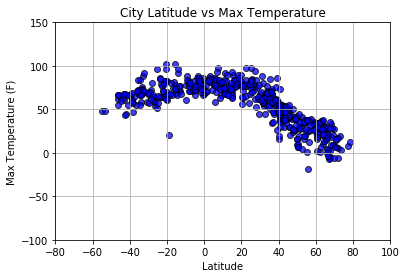

In [6]:
#City Latitude vs Max Temperature

plt.scatter(weather_data['Lat'], weather_data['Max Temp'],facecolors='blue', edgecolors='black', alpha=0.75 )

plt.grid()
#plt.set_facecolor("lightslategray")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(-100,150)
plt.xlim(-80,100)
plt.title("City Latitude vs Max Temperature")#+ "("+weather_data['Date']+")")


Text(0.5,1,'City Latitude vs Humidity')

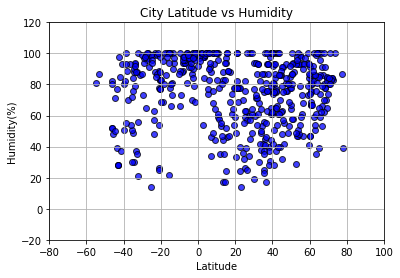

In [7]:
#City Latitude vs Humidity
plt.scatter(weather_data['Lat'], weather_data['Humidity'],facecolors='blue', edgecolors='black', alpha=0.75 )

plt.grid()
#plt.set_facecolor("lightslategray")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.title("City Latitude vs Humidity")#+ "("+weather_data['Date']+")")

Text(0.5,1,'City Latitude vs Cloudiness')

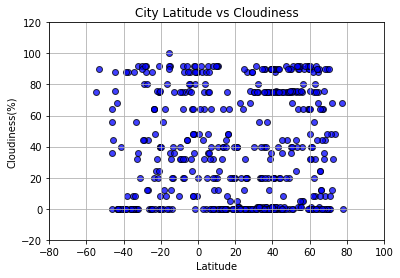

In [8]:
#Latitude vs Cloudiness
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'],facecolors='blue', edgecolors='black', alpha=0.75 )

plt.grid()
#plt.set_facecolor("lightslategray")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.title("City Latitude vs Cloudiness")

Text(0.5,1,'City Latitude vs Cloudiness')

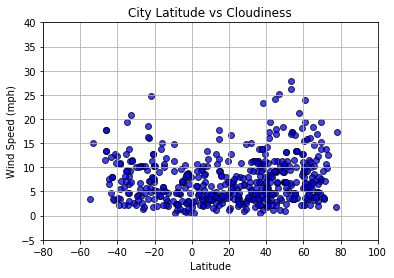

In [9]:
#Latitude vs Wind Speed
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'],facecolors='blue', edgecolors='black', alpha=0.75 )

plt.grid()
#plt.set_facecolor("lightslategray")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,40)
plt.xlim(-80,100)
plt.title("City Latitude vs Cloudiness")#+ "("+weather_data['Date']+")")

In [10]:
weather_data.to_csv("Weather_Report.csv", encoding='utf-8')